In [1]:
from google.colab import files
uploaded = files.upload()


Saving Dataset.zip to Dataset.zip


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [3]:
dir = '/content/Dataset'
categories = ['Cats images', 'Dogs images']


In [5]:
import os

dir_path = "/content/Dataset"
categories = ["Cats images", "Dogs images"]


In [7]:
import os
os.listdir("/content")


['.config', 'Dataset.zip', 'sample_data']

In [11]:
import zipfile

with zipfile.ZipFile("/content/Dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

print("Extraction Completed ✅")


Extraction Completed ✅


In [12]:
import os
os.listdir("/content")


['.config', 'Dataset', 'Dataset.zip', 'sample_data']

In [13]:
os.listdir("/content/Dataset")


['Dogs images', 'Cats images']

In [14]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [15]:
dir_path = "/content/Dataset"
categories = ["Dogs images", "Cats images"]


In [24]:
data = []
IMG_SIZE = 64
LIMIT = 1000   # 1000 per class (safe for Colab)

for category in categories:
    path = os.path.join(dir_path, category)
    label = categories.index(category)

    count = 0
    for img in os.listdir(path):
        if count >= LIMIT:
            break

        try:
            img_path = os.path.join(path, img)
            pet_img = cv2.imread(img_path, 0)   # grayscale
            pet_img = cv2.resize(pet_img, (IMG_SIZE, IMG_SIZE))
            image = pet_img.flatten()
            data.append([image, label])
            count += 1
        except:
            pass

print("Total images loaded:", len(data))


Total images loaded: 2000


In [17]:
random.shuffle(data)


In [18]:
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

features = np.array(features) / 255.0   # Normalize (IMPORTANT)
labels = np.array(labels)


In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(
    features, labels, test_size=0.2, random_state=42
)


In [20]:
model = SVC(C=1, kernel='rbf', gamma='scale')
model.fit(xtrain, ytrain)


SVC(C=1)

In [21]:
with open("svm_model.pickle", "wb") as f:
    pickle.dump(model, f)


In [22]:
prediction = model.predict(xtest)
accuracy = model.score(xtest, ytest)

print("Accuracy is:", accuracy)
print("Prediction is:", categories[prediction[0]])


Accuracy is: 0.5875
Prediction is: Dogs images


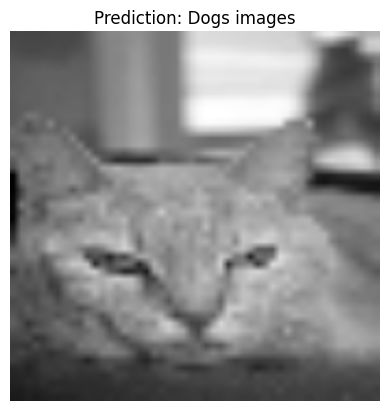

In [25]:
mypet = xtest[0].reshape(50, 50)

# resize for display only
display_img = cv2.resize(mypet, (300, 300))

plt.imshow(display_img, cmap='gray')
plt.title("Prediction: " + categories[prediction[0]])
plt.axis('off')
plt.show()
